In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [69]:
df = pd.read_csv('data-set/crime_data_w_population_and_crime_rate.csv')
df.head()

,county_name,crime_rate_per_100000,index,EDITION,PART,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1,1,4,1612,318667,318667,15,15,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,2,1,4,130,50717,50717,4,4,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,3,1,4,604,8040,8040,2,2,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,4,1,4,2681,444,444,1,1,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,5,1,4,1137,26971,26971,3,3,...,4,17,368,149,494,60,0,27083,22,31


In [70]:
df.columns

Index(['county_name', 'crime_rate_per_100000', 'index', 'EDITION', 'PART',
       'IDNO', 'CPOPARST', 'CPOPCRIM', 'AG_ARRST', 'AG_OFF', 'COVIND', 'INDEX',
       'MODINDX', 'MURDER', 'RAPE', 'ROBBERY', 'AGASSLT', 'BURGLRY', 'LARCENY',
       'MVTHEFT', 'ARSON', 'population', 'FIPS_ST', 'FIPS_CTY'],
      dtype='object')

In [71]:
df = df.drop(['index', 'EDITION', 'PART'], axis = 1)

In [72]:
df.head()

,county_name,crime_rate_per_100000,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,...,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON,population,FIPS_ST,FIPS_CTY
0,"St. Louis city, MO",1791.995377,1612,318667,318667,15,15,100.0,5706,22329,...,200,1778,3609,4995,13791,3543,464,318416,29,510
1,"Crittenden County, AR",1754.914968,130,50717,50717,4,4,100.0,873,3424,...,38,165,662,1482,1753,189,28,49746,5,35
2,"Alexander County, IL",1664.700485,604,8040,8040,2,2,100.0,127,278,...,2,5,119,82,184,12,2,7629,17,3
3,"Kenedy County, TX",1456.310680,2681,444,444,1,1,100.0,6,13,...,3,1,2,5,4,4,0,412,48,261
4,"De Soto Parish, LA",1447.402430,1137,26971,26971,3,3,100.0,392,703,...,4,17,368,149,494,60,0,27083,22,31


In [73]:
df.isnull().any()

county_name              False
crime_rate_per_100000    False
IDNO                     False
CPOPARST                 False
CPOPCRIM                 False
AG_ARRST                 False
AG_OFF                   False
COVIND                   False
INDEX                    False
MODINDX                  False
MURDER                   False
RAPE                     False
ROBBERY                  False
AGASSLT                  False
BURGLRY                  False
LARCENY                  False
MVTHEFT                  False
ARSON                    False
population               False
FIPS_ST                  False
FIPS_CTY                 False
dtype: bool

In [74]:
county = df['county_name'].unique().tolist()

fips_df = pd.DataFrame({'county': county, 'FIPS_ST': df['FIPS_ST'], 'FIPS_CTY' : df['FIPS_CTY']})

In [75]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3136 entries, 0 to 3135
Data columns (total 3 columns):
county      3136 non-null object
FIPS_ST     3136 non-null int64
FIPS_CTY    3136 non-null int64
dtypes: int64(2), object(1)
memory usage: 73.6+ KB


In [76]:
population_df = pd.DataFrame({'county': county, 'population': df['population']})
new_index = population_df['population'].sort_values(ascending=False).index.values
population_df = population_df.reindex(new_index)
population_df = population_df[:50]
population_df.head()

,county,population
396,"Los Angeles County, CA",10017068
173,"Cook County, IL",5240700
93,"Harris County, TX",4336853
484,"Maricopa County, AZ",4009412
605,"San Diego County, CA",3211252


Text(0.5, 1.0, 'Population between Cities')

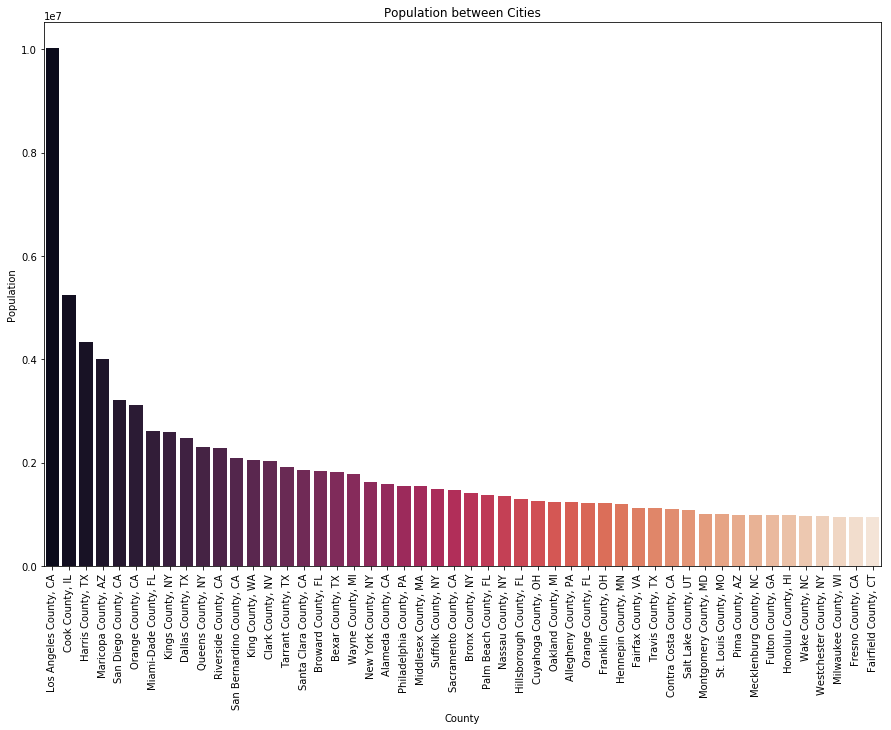

In [78]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=population_df['county'][:50], y=population_df['population'][:50], palette = 'rocket')

plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Population')
plt.title('Population between Cities')

In [82]:
crime_rate = pd.DataFrame({'county': county, 'crime_rate': df['crime_rate_per_100000']})
rate_index = crime_rate['crime_rate'].sort_values(ascending=False).index.values
crime_rate = crime_rate.reindex(rate_index)
crime_rate.head()

,county,crime_rate
0,"St. Louis city, MO",1791.995377
1,"Crittenden County, AR",1754.914968
2,"Alexander County, IL",1664.700485
3,"Kenedy County, TX",1456.310680
4,"De Soto Parish, LA",1447.402430


Text(0.5, 1.0, 'Crime Rate Per 100000 Per County')

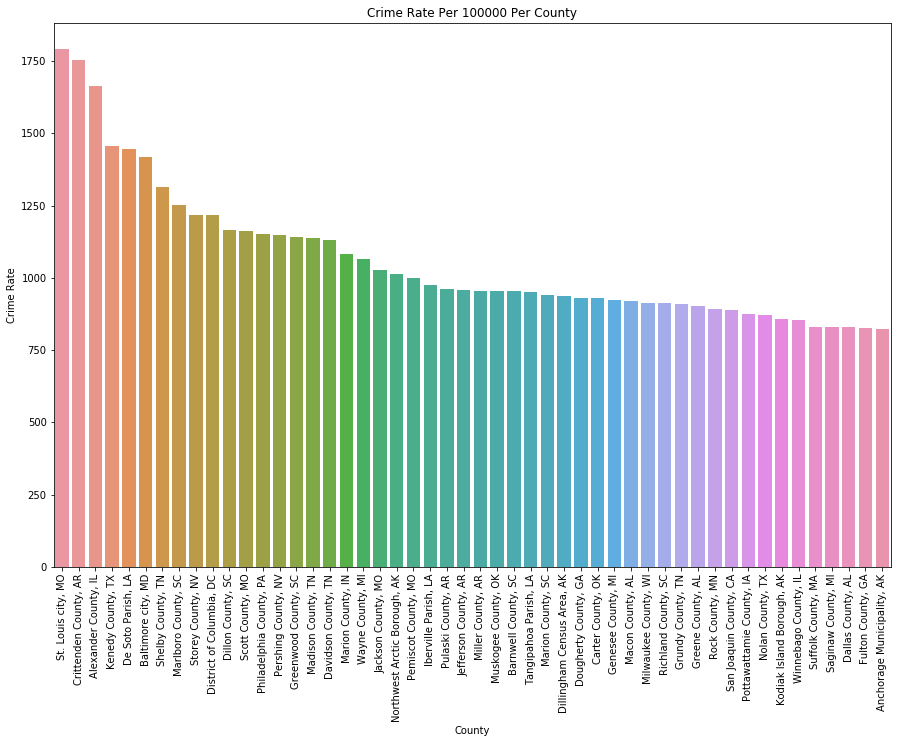

In [84]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=crime_rate['county'][:50], y=crime_rate['crime_rate'][:50])

plt.xticks(rotation=90)
plt.xlabel('County')
plt.ylabel('Crime Rate')
plt.title('Crime Rate Per 100000 Per County')

In [85]:
new_df = df.drop(['crime_rate_per_100000','population', 'FIPS_ST', 'FIPS_CTY'], axis=1)
new_df.head()

,county_name,IDNO,CPOPARST,CPOPCRIM,AG_ARRST,AG_OFF,COVIND,INDEX,MODINDX,MURDER,RAPE,ROBBERY,AGASSLT,BURGLRY,LARCENY,MVTHEFT,ARSON
0,"St. Louis city, MO",1612,318667,318667,15,15,100.0,5706,22329,119,200,1778,3609,4995,13791,3543,464
1,"Crittenden County, AR",130,50717,50717,4,4,100.0,873,3424,8,38,165,662,1482,1753,189,28
2,"Alexander County, IL",604,8040,8040,2,2,100.0,127,278,1,2,5,119,82,184,12,2
3,"Kenedy County, TX",2681,444,444,1,1,100.0,6,13,0,3,1,2,5,4,4,0
4,"De Soto Parish, LA",1137,26971,26971,3,3,100.0,392,703,3,4,17,368,149,494,60,0


In [87]:
melt_df = new_df.melt(id_vars=['county_name'], var_name="Crime", value_name='Count')

In [88]:
melt_df.head()

,county_name,Crime,Count
0,"St. Louis city, MO",IDNO,1612.0
1,"Crittenden County, AR",IDNO,130.0
2,"Alexander County, IL",IDNO,604.0
3,"Kenedy County, TX",IDNO,2681.0
4,"De Soto Parish, LA",IDNO,1137.0


In [89]:
melt_df.shape

(50176, 3)

In [92]:
crime_index = melt_df['Count'].sort_values(ascending=False).index.values
melt_df = melt_df.reindex(crime_index)

melt_df.head()

,county_name,Crime,Count
6668,"Los Angeles County, CA",CPOPCRIM,9980757.0
3532,"Los Angeles County, CA",CPOPARST,9980757.0
3309,"Cook County, IL",CPOPARST,5185540.0
6445,"Cook County, IL",CPOPCRIM,5151374.0
3229,"Harris County, TX",CPOPARST,4272223.0


In [57]:
len(melt_df['county_name'].unique().tolist())

3136